In [1]:
# This is a python 3 script
%matplotlib inline
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt

In [3]:
data = '/Volumes/SD-Mac/research/bhr71/alma_cy4/spectra_lines_extraction_on_cont_peak.txt'
foo = open(data, 'r').readlines()

linelist = ['CS 7-6', 'HCO+ 4-3', 'HCN J=4-3', 'H13CN 4-3']
# get the indice of the range of data that belong to individual line
ind_list = [0, 0, 0, 0]
comment_count = 0

for i, line in enumerate(foo):
    for j in range(len(linelist)):
        if linelist[j] in line:
            ind_list[j] = i

# populate the data into a dictionary
collection = {}
for i, lname in enumerate(linelist):
    # select the data corresponding to the line
    if i != len(linelist)-1:
        data_dum = foo[ind_list[i]+1:ind_list[i+1]-1]
    else:
        data_dum = foo[ind_list[i]+1:]
    
    collection[lname] = {'velo(m/s)':[], 'Jy/beam':[]}
    
    for d in data_dum:
        collection[lname]['velo(m/s)'].append(float(d.split()[0]))
        collection[lname]['Jy/beam'].append(float(d.split()[1]))

    collection[lname]['velo(m/s)'] = np.array(collection[lname]['velo(m/s)'])
    collection[lname]['Jy/beam'] = np.array(collection[lname]['Jy/beam'])

CS 7-6
52.05469154684249
HCO+ 4-3
48.090780526864194
HCN J=4-3
48.69737296893458
H13CN 4-3
51.3166463410716


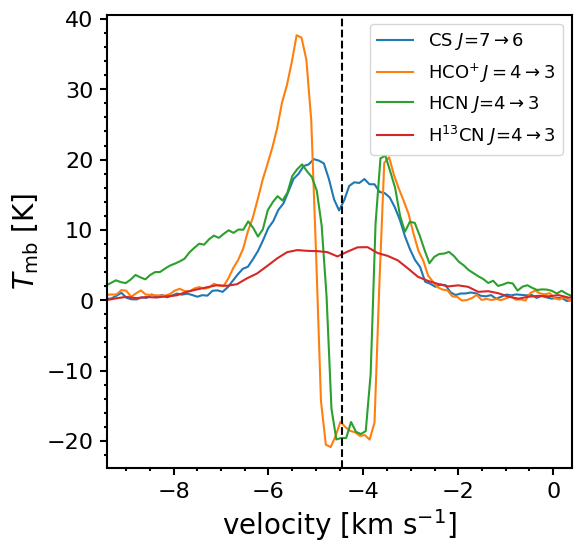

In [18]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

labellist = [r'CS $J$=7$\rightarrow$6', r'HCO$^{+}\,J=4\rightarrow3$', 
             r'HCN $J$=4$\rightarrow$3', r'H$^{13}$CN $J$=4$\rightarrow$3']

restflist = [342.882857, 356.734242, 354.505473, 345.339756]

for i, line in enumerate(linelist):
    print(line)
    jyb2t = 13.6*(300/restflist[i])**2*(1/0.4)*(1/0.28)
    
    print(0.56*jyb2t)
    
    ax.plot(collection[line]['velo(m/s)']/1e3,
            collection[line]['Jy/beam']*jyb2t, label=labellist[i], linewidth=1.5)
# source velocity
ax.axvline(-4.45, color='k', linestyle='--')

ax.legend(loc='best', fontsize=13)
ax.set_xlim([-9.4,0.4])
ax.set_xlabel(r'velocity [km s$^{-1}$]', fontsize=20)
ax.set_ylabel(r'$T_{\rm mb}$ [K]', fontsize=20)
ax.tick_params('both',labelsize=16,width=1.5,which='major',pad=5,length=5)
ax.tick_params('both',labelsize=16,width=1.5,which='minor',pad=5,length=2.5)

[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()

fig.savefig('/Volumes/SD-Mac/research/bhr71/alma_cy4/all_lines_rough_extraction.pdf', format='pdf',
            dpi=300, bbox_inches='tight')


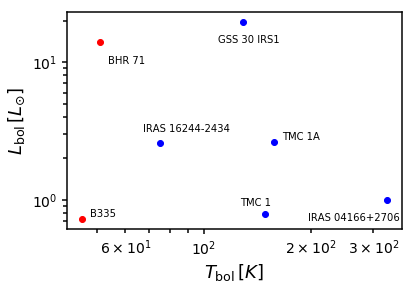

In [138]:
# source selection plot for ALMA cy5 proposal on infall
objlist = ['TMC 1A', 'TMC 1', 'IRAS 15398-3359', 'GSS 30 IRS1', 'IRAM 04191+1522',
           'IRAS 04166+2706', 'IRAS 16244-2434', 'BHR 71', 'B335']
lbol = [2.62, 0.79, 1.49, 19.7, 0.11, 1.0, 2.6, 13.92, 0.72]
tbol = [158, 149, 43.2, 129, 31, 327, 75, 51.1, 45.4]

fig = plt.figure()
ax = fig.add_subplot(111)


for i, o in enumerate(objlist):
    # exclude source
    if o in ['IRAS 15398-3359', 'IRAM 04191+1522']:
        continue
    if o not in ['IRAS 04166+2706', 'GSS 30 IRS1', 'BHR 71', 'B335', 'TMC 1', 'IRAS 16244-2434']:
        ax.plot(tbol[i], lbol[i], 'o', color='b')
        ax.annotate(o, xy=(tbol[i], lbol[i]), xytext=(tbol[i]*1.05, lbol[i]*1.05))
    if o == 'BHR 71':
        ax.plot(tbol[i], lbol[i], 'o', color='r')
        ax.annotate(o, xy=(tbol[i], lbol[i]), xytext=(tbol[i]*1.05, lbol[i]*0.7))
    if o == 'B335':
        ax.plot(tbol[i], lbol[i], 'o', color='r')
        ax.annotate(o, xy=(tbol[i], lbol[i]), xytext=(tbol[i]*1.05, lbol[i]*1.05))
    if o == 'TMC 1':
        ax.plot(tbol[i], lbol[i], 'o', color='b')
        ax.annotate(o, xy=(tbol[i], lbol[i]), xytext=(tbol[i]*0.85, lbol[i]*1.15))
    if o == 'IRAS 04166+2706':
        ax.plot(tbol[i], lbol[i], 'o', color='b')
        ax.annotate(o, xy=(tbol[i], lbol[i]), xytext=(tbol[i]*0.6, lbol[i]*0.7))
    if o == 'GSS 30 IRS1':
        ax.plot(tbol[i], lbol[i], 'o', color='b')
        ax.annotate(o, xy=(tbol[i], lbol[i]), xytext=(tbol[i]*0.85, lbol[i]*0.7))
    if o == 'IRAS 16244-2434':
        ax.plot(tbol[i], lbol[i], 'o', color='b')
        ax.annotate(o, xy=(tbol[i], lbol[i]), xytext=(tbol[i]*0.9, lbol[i]*1.2))

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r'$L_{\rm bol}\,[L_{\odot}]$', fontsize=18)
ax.set_xlabel(r'$T_{\rm bol}\,[K]$', fontsize=18)

ax.tick_params('both',labelsize=14,width=1.5,which='major',pad=5,length=5)
ax.tick_params('both',labelsize=14,width=1.5,which='minor',pad=5,length=4)

[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()

fig.savefig('/Volumes/SD-Mac/Dropbox/alma_cy5_infall/source_distribution.pdf',
            format='pdf', dpi=300, bbox_inches='tight')